In [25]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
#read in data 
data_url = "https://questionnaire-148920.appspot.com/swe/data.html"
salary_data = pd.read_html(data_url)

#create dataframe
salary_data_df = salary_data[0]

In [27]:
#outputting read data 
display(salary_data_df)

,Player,Salary,Year,Level
0,"Abreu, Jose","$11,666,667",2016,MLB
1,"Acevedo, Andury","$507,500",2016,MLB
2,"Ackley, Dustin","$3,200,000",2016,MLB
3,"Adames, Cristhian","$507,500",2016,MLB
4,"Adams, Austin","$507,500",2016,MLB
...,...,...,...,...
1203,"Zimmerman, Ryan","$14,000,000",2016,MLB
1204,"Zimmermann, Jordan","$18,000,000",2016,MLB
1205,"Zobrist, Ben","$10,500,000",2016,MLB
1206,"Zunino, Mike","$$$507,500",2016,MLB


Confirming that the table is read properly from the provided URL

In [28]:
#count table null values 
#checking for potential corrupted data on columns
null_count = salary_data_df.isnull().sum()
print(null_count)

Player     0
Salary    22
Year       0
Level      0
dtype: int64


Counting Null values in table 

In [29]:
salary_data_df['Salary'] = pd.to_numeric(salary_data_df['Salary'].replace('[$,]', '', regex=True), errors='coerce')
salary_data_df.dropna(subset=['Salary'], inplace=True)
salary_data_df['Salary'] = salary_data_df['Salary'].replace('[$,]', '', regex=True).astype(float)

# Calculate the median salary, excluding NaN values
median_salary = salary_data_df['Salary'].median()

# Fill NaN values in the 'Salary' column with the median salary
salary_data_df['Salary'].fillna(median_salary, inplace=True)

replacing null salary values in table with median salary. 

In [30]:
display(salary_data_df)
most_recent_year = salary_data_df['Year'].max()

,Player,Salary,Year,Level
0,"Abreu, Jose",11666667.0,2016,MLB
1,"Acevedo, Andury",507500.0,2016,MLB
2,"Ackley, Dustin",3200000.0,2016,MLB
3,"Adames, Cristhian",507500.0,2016,MLB
4,"Adams, Austin",507500.0,2016,MLB
...,...,...,...,...
1203,"Zimmerman, Ryan",14000000.0,2016,MLB
1204,"Zimmermann, Jordan",18000000.0,2016,MLB
1205,"Zobrist, Ben",10500000.0,2016,MLB
1206,"Zunino, Mike",507500.0,2016,MLB


In [31]:
display(salary_data_df.nlargest(125, 'Salary')['Salary'])
top_125_salaries = salary_data_df.nlargest(125, 'Salary')['Salary']

# Calculate the average (mean) manually
contract_offer = top_125_salaries.sum() / len(top_125_salaries)

583    34571429.0
449    34000000.0
871    30000000.0
471    28410000.0
159    28000000.0
          ...    
476    10000000.0
517    10000000.0
580    10000000.0
146     9950000.0
639     9666667.0
Name: Salary, Length: 125, dtype: float64

In [32]:

print(f"Qualifying Offer: {most_recent_year}: ${contract_offer:,.2f}")

Qualifying Offer: 2016: $16,496,956.05


In [33]:
%matplotlib inline

In [34]:

top_125_salaries = salary_data_df.nlargest(125, 'Salary').sort_values(by='Salary', ascending=False)


In [35]:
top_125_salaries = salary_data_df.nlargest(125, 'Salary').sort_values(by='Salary', ascending=False)

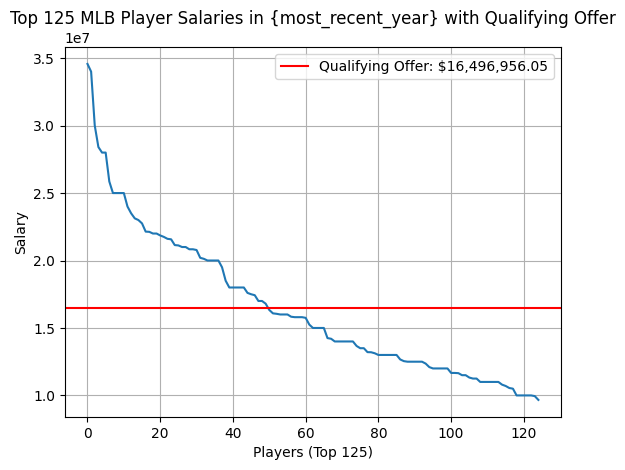

In [36]:
# Create a line plot using Seaborn
sns.lineplot(data=top_125_salaries['Salary'].reset_index(drop=True))

# Add a horizontal line for the Qualifying Offer
plt.axhline(y=contract_offer, color='r', linestyle='-', label=f'Qualifying Offer: ${contract_offer:,.2f}')
plt.title(f'Top 125 MLB Player Salaries in {most_recent_year} with Qualifying Offer')
plt.xlabel('Players (Top 125)')
plt.ylabel('Salary')
plt.grid(True)
plt.legend()
plt.show()